In [10]:
import pandas as pd
pd.set_option('display.max_rows', 500)

Check classes from data

In [5]:
_csv_path_train = "/home/a52550/Desktop/datasets/ISIC2017/train/ISIC-2017_Training_Part3_GroundTruth.csv"
_csv_path_train_original = "/home/a52550/Desktop/datasets/ISIC2017/train/ISIC-2017_Training_Part3_GroundTruth_original.csv"
_csv_path_validation = "/home/a52550/Desktop/datasets/ISIC2017/validation/ISIC-2017_Validation_Part3_GroundTruth.csv"
_csv_path_validation_original = "/home/a52550/Desktop/datasets/ISIC2017/validation/ISIC-2017_Validation_Part3_GroundTruth_original.csv"
_csv_path_test = "/home/a52550/Desktop/datasets/ISIC2017/test/ISIC-2017_Test_v2_Part3_GroundTruth.csv"
_csv_path_test_original = "/home/a52550/Desktop/datasets/ISIC2017/test/ISIC-2017_Test_v2_Part3_GroundTruth_original.csv"

In [6]:
train_data = pd.read_csv(_csv_path_train)
train_data_original = pd.read_csv(_csv_path_train_original)
validation_data = pd.read_csv(_csv_path_validation)
validation_data_original = pd.read_csv(_csv_path_validation_original)
test_data = pd.read_csv(_csv_path_test)
test_data_original = pd.read_csv(_csv_path_test_original)
test_data_original.head()

,image_id,melanoma,seborrheic_keratosis
0,ISIC_0012086,0.0,1.0
1,ISIC_0012092,0.0,0.0
2,ISIC_0012095,0.0,0.0
3,ISIC_0012134,0.0,1.0
4,ISIC_0012136,0.0,1.0


In [7]:
print("Train original:")
print(train_data_original[train_data_original['melanoma'] == 1].shape)
print(train_data_original[train_data_original['seborrheic_keratosis'] == 1].shape)
print(train_data_original[(train_data_original['melanoma'] == 0) & (train_data_original['seborrheic_keratosis'] == 0)].shape)
print("Train after:")
print(train_data[train_data['category'] == 1].shape) # melanoma
print(train_data[train_data['category'] == 2].shape) # seborrheic_keratosis
print(train_data[train_data['category'] == 0].shape) # nevi

print("validation original:")
print(validation_data_original[validation_data_original['melanoma'] == 1].shape)
print(validation_data_original[validation_data_original['seborrheic_keratosis'] == 1].shape)
print(validation_data_original[(validation_data_original['melanoma'] == 0) & (validation_data_original['seborrheic_keratosis'] == 0)].shape)
print("validation after:")
print(validation_data[validation_data['category'] == 1].shape) # melanoma
print(validation_data[validation_data['category'] == 2].shape) # seborrheic_keratosis
print(validation_data[validation_data['category'] == 0].shape) # nevi

print("test original:")
print(test_data_original[test_data_original['melanoma'] == 1].shape)
print(test_data_original[test_data_original['seborrheic_keratosis'] == 1].shape)
print(test_data_original[(test_data_original['melanoma'] == 0) & (test_data_original['seborrheic_keratosis'] == 0)].shape)
print("test after:")
print(test_data[test_data['category'] == 1].shape) # melanoma
print(test_data[test_data['category'] == 2].shape) # seborrheic_keratosis
print(test_data[test_data['category'] == 0].shape) # nevi
# validation_data.head()
# test_data.head()

Train original:
(374, 3)
(254, 3)
(1372, 3)
Train after:
(374, 2)
(254, 2)
(1372, 2)
validation original:
(30, 3)
(42, 3)
(78, 3)
validation after:
(30, 2)
(42, 2)
(78, 2)
test original:
(117, 3)
(90, 3)
(393, 3)
test after:
(117, 2)
(90, 2)
(393, 2)


In [8]:
df = pd.read_csv('results/all_metrics.csv')
len(df)

150

In [9]:
# df2 = df.groupby(['model_name'], as_index=False)
# count = 0

df_best_results = pd.DataFrame()

# for model_name, group in df2:
#     df_aux = df_aux.append(group.sort_values(by='loss', ascending=True).head(3), ignore_index=True)
#     df_aux = df_aux.append(group.sort_values(by='accuracy', ascending=False).head(3), ignore_index=True)
#     df_aux = df_aux.append(group.sort_values(by='balanced_accuracy', ascending=False).head(3), ignore_index=True)
#     df_aux = df_aux.append(group.sort_values(by='balanced_accuracy', ascending=False).head(3), ignore_index=True)
#     count += 1

# print(len(df_aux))
# df_aux = df_aux.drop_duplicates()
# print(len(df_aux))

df_aux = df
df_aux = df_aux[(df_aux['partition'] != 'validation')]

In [10]:
df_best_results=df_best_results.append(df_aux[(df_aux['model_name'] == 'efficientnet_b0') & (df_aux['partition'] == 'test')].sort_values(by='balanced_accuracy', ascending=False).head(1))
df_best_results=df_best_results.append(df_aux[(df_aux['model_name'] == 'efficientnet_b0') & (df_aux['partition'] == 'test-last')].sort_values(by='balanced_accuracy', ascending=False).head(1))
# AdamW 32 0.001

In [11]:
df_best_results=df_best_results.append(df_aux[(df_aux['model_name'] == 'efficientnet_b1')  & (df_aux['partition'] == 'test')].sort_values(by='balanced_accuracy', ascending=False).head(1))
df_best_results=df_best_results.append(df_aux[(df_aux['model_name'] == 'efficientnet_b1')  & (df_aux['partition'] == 'test-last')].sort_values(by='balanced_accuracy', ascending=False).head(1))
# AdamW 32 0.001

In [12]:
df_best_results=df_best_results.append(df_aux[(df_aux['model_name'] == 'efficientnet_b2') & (df_aux['partition'] == 'test')].sort_values(by='balanced_accuracy', ascending=False).head(1))
df_best_results=df_best_results.append(df_aux[(df_aux['model_name'] == 'efficientnet_b2') & (df_aux['partition'] == 'test-last')].sort_values(by='balanced_accuracy', ascending=False).head(1))
# AdamW 32 0.001

In [13]:
df_best_results=df_best_results.append(df_aux[(df_aux['model_name'] == 'efficientnet_b3') & (df_aux['partition'] == 'test')].sort_values(by='balanced_accuracy', ascending=False).head(1))
df_best_results=df_best_results.append(df_aux[(df_aux['model_name'] == 'efficientnet_b3') & (df_aux['partition'] == 'test-last')].sort_values(by='balanced_accuracy', ascending=False).head(1))
# Adam 32 0.001

In [14]:
df_best_results=df_best_results.append(df_aux[(df_aux['model_name'] == 'efficientnet_b4') & (df_aux['partition'] == 'test')].sort_values(by='balanced_accuracy', ascending=False).head(1))
df_best_results=df_best_results.append(df_aux[(df_aux['model_name'] == 'efficientnet_b4') & (df_aux['partition'] == 'test-last')].sort_values(by='balanced_accuracy', ascending=False).head(1))
# Adam 25 0.001

In [15]:
df_best_results=df_best_results.append(df_aux[(df_aux['model_name'] == 'efficientnet_b5') & (df_aux['partition'] == 'test')].sort_values(by='balanced_accuracy', ascending=False).head(1))
df_best_results=df_best_results.append(df_aux[(df_aux['model_name'] == 'efficientnet_b5') & (df_aux['partition'] == 'test-last')].sort_values(by='balanced_accuracy', ascending=False).head(1))
# Adam 4 0.001

In [16]:
df_best_results=df_best_results.append(df_aux[(df_aux['model_name'] == 'efficientnet_b6') & (df_aux['partition'] == 'test')].sort_values(by='balanced_accuracy', ascending=False).head(1))
df_best_results=df_best_results.append(df_aux[(df_aux['model_name'] == 'efficientnet_b6') & (df_aux['partition'] == 'test-last')].sort_values(by='balanced_accuracy', ascending=False).head(1))
# SGD 4 0.001

In [17]:
df_best_results=df_best_results.append(df_aux[(df_aux['model_name'] == 'resnest101e') & (df_aux['partition'] == 'test')].sort_values(by='balanced_accuracy', ascending=False).head(1))
df_best_results=df_best_results.append(df_aux[(df_aux['model_name'] == 'resnest101e') & (df_aux['partition'] == 'test-last')].sort_values(by='balanced_accuracy', ascending=False).head(1))
# AdamW 32 0.0001

In [18]:
df_best_results=df_best_results.append(df_aux[(df_aux['model_name'] == 'seresnext101_32x8d') & (df_aux['partition'] == 'test')].sort_values(by='balanced_accuracy', ascending=False).head(1))
df_best_results=df_best_results.append(df_aux[(df_aux['model_name'] == 'seresnext101_32x8d') & (df_aux['partition'] == 'test-last')].sort_values(by='balanced_accuracy', ascending=False).head(1))
# NovoGrad 4 0.001

In [19]:
df_best_results=df_best_results.append(df_aux[(df_aux['model_name'] == 'vgg19') & (df_aux['partition'] == 'test')].sort_values(by='balanced_accuracy', ascending=False).head(1))
df_best_results=df_best_results.append(df_aux[(df_aux['model_name'] == 'vgg19') & (df_aux['partition'] == 'test-last')].sort_values(by='balanced_accuracy', ascending=False).head(1))
# SGD 32 0.001

In [20]:
df_best_results=df_best_results.append(df_aux[(df_aux['model_name'] == 'senet154') & (df_aux['partition'] == 'test')].sort_values(by='balanced_accuracy', ascending=False).head(1))
df_best_results=df_best_results.append(df_aux[(df_aux['model_name'] == 'senet154') & (df_aux['partition'] == 'test-last')].sort_values(by='balanced_accuracy', ascending=False).head(1))
# Adam 4 0.001

In [21]:
df_best_results=df_best_results.append(df_aux[(df_aux['model_name'] == 'resnext101_32x8d') & (df_aux['partition'] == 'test')].sort_values(by='balanced_accuracy', ascending=False).head(1))
df_best_results=df_best_results.append(df_aux[(df_aux['model_name'] == 'resnext101_32x8d') & (df_aux['partition'] == 'test-last')].sort_values(by='balanced_accuracy', ascending=False).head(1))
# Adam	32	0.0001

In [22]:
df_best_results=df_best_results.append(df_aux[(df_aux['model_name'] == 'pnasnet5large') & (df_aux['partition'] == 'test')].sort_values(by='balanced_accuracy', ascending=False).head(1))
df_best_results=df_best_results.append(df_aux[(df_aux['model_name'] == 'pnasnet5large') & (df_aux['partition'] == 'test-last')].sort_values(by='balanced_accuracy', ascending=False).head(1))
# NovoGrad	4	0.001

In [23]:
# df_best_results.drop_duplicates().to_csv('best_results_DA_noPP.csv', index=False)

In [24]:
df_model_name = pd.DataFrame({'model_name': ["resnext101_32x8d", "efficientnet_b0", "efficientnet_b1", "efficientnet_b2", "efficientnet_b3", "efficientnet_b4", "efficientnet_b5", "efficientnet_b6", "vgg19", "seresnext101_32x8d", "resnest101e", "pnasnet5large", "senet154"]})
df_optimizer = pd.DataFrame({'optimizer': ["SGD", "Adam", "AdamW"]})
df_batch_size = pd.DataFrame({'batch_size': [4, 8, 16, 32, 64]})
df_lr_init = pd.DataFrame({'lr_init': [0.001, 0.0001]})

df_model_name['merge_column'] = 1
df_optimizer['merge_column'] = 1
df_batch_size['merge_column'] = 1
df_lr_init['merge_column'] = 1


print(df_model_name.shape)
print(df_optimizer.shape)
print(df_batch_size.shape)
print(df_lr_init.shape)


(13, 2)
(3, 2)
(5, 2)
(2, 2)


In [25]:
df_all_combinations = pd.merge(df_model_name, df_optimizer, on='merge_column')
df_all_combinations = pd.merge(df_all_combinations, df_batch_size, on='merge_column')
df_all_combinations = pd.merge(df_all_combinations, df_lr_init, on='merge_column')

df_all_combinations = df_all_combinations.drop(columns=['merge_column'])
df_all_combinations = df_all_combinations.drop_duplicates()

df_all_combinations

,model_name,optimizer,batch_size,lr_init
0,resnext101_32x8d,SGD,4,0.0010
1,resnext101_32x8d,SGD,4,0.0001
2,resnext101_32x8d,SGD,8,0.0010
3,resnext101_32x8d,SGD,8,0.0001
4,resnext101_32x8d,SGD,16,0.0010
...,...,...,...,...
385,senet154,AdamW,16,0.0001
386,senet154,AdamW,32,0.0010
387,senet154,AdamW,32,0.0001
388,senet154,AdamW,64,0.0010


In [26]:
df2 = df[['model_name', 'optimizer', 'batch_size', 'lr_init']]
df2 = df2[(df2['batch_size'] != 5) & (df2['batch_size'] != 10) & (df2['batch_size'] != 25)]
df2 = df2[~df2['optimizer'].isin(['Adadelta', 'NovoGrad', 'Nadam', 'Radam', 'Lookahead_AdamP', 'AdamP', 'SGDP', 'Adafactor', 'RMSprop'])]
df2 = df2.drop_duplicates()
df2

,model_name,optimizer,batch_size,lr_init
0,efficientnet_b0,AdamW,8,0.0010
3,efficientnet_b1,AdamW,8,0.0010
6,efficientnet_b1,AdamW,16,0.0010
9,efficientnet_b2,Adam,8,0.0010
12,efficientnet_b2,AdamW,16,0.0010
15,efficientnet_b3,Adam,32,0.0010
21,efficientnet_b4,AdamW,16,0.0010
24,efficientnet_b4,Adam,16,0.0010
27,efficientnet_b5,Adam,8,0.0010
33,efficientnet_b6,SGD,4,0.0010


In [27]:
set(df2['model_name']) - set(df_all_combinations['model_name'])
print(df_all_combinations['model_name'].unique())
print(df_all_combinations['optimizer'].unique())
print(df_all_combinations['batch_size'].unique())
print(df_all_combinations['lr_init'].unique())

print(df2['model_name'].unique())
print(df2['optimizer'].unique())
print(df2['batch_size'].unique())
print(df2['lr_init'].unique())


['resnext101_32x8d' 'efficientnet_b0' 'efficientnet_b1' 'efficientnet_b2'
 'efficientnet_b3' 'efficientnet_b4' 'efficientnet_b5' 'efficientnet_b6'
 'vgg19' 'seresnext101_32x8d' 'resnest101e' 'pnasnet5large' 'senet154']
['SGD' 'Adam' 'AdamW']
[ 4  8 16 32 64]
[0.001  0.0001]
['efficientnet_b0' 'efficientnet_b1' 'efficientnet_b2' 'efficientnet_b3'
 'efficientnet_b4' 'efficientnet_b5' 'efficientnet_b6' 'resnest101e'
 'seresnext101_32x8d' 'vgg19' 'senet154' 'resnext101_32x8d'
 'pnasnet5large']
['AdamW' 'Adam' 'SGD']
[ 8 16 32  4]
[0.001  0.0001]


In [28]:
comb_missing = df_all_combinations.merge(df2, how='left', indicator=True)
comb_missing = comb_missing[comb_missing['_merge'] == 'left_only']
comb_missing = comb_missing.drop(columns=['_merge'])
comb_missing = comb_missing.drop_duplicates()

comb_missing = comb_missing[comb_missing['lr_init'] == 0.0001]

In [29]:
# comb_missing.to_csv('comb_missing.csv', index=False)

Check best results

In [97]:
# df_best_results_DA1_noPP = pd.read_csv('best_results_DA_noPP.csv')
df_best_results_noDA_noPP = pd.read_csv('best_results_noDA_noPP.csv')
df_results_DA2_DA3_noPP = pd.read_csv('results/all_metrics.csv')
df_results_DA2_DA3_noPP = pd.read_csv('results/all_metrics.csv')
df_best_results_DA2_noPP = df_results_DA2_DA3_noPP[(df_results_DA2_DA3_noPP['data_augmentation'] == 2) & (df_results_DA2_DA3_noPP['partition'] != 'validation')]
df_best_results_DA3_noPP = df_results_DA2_DA3_noPP[(df_results_DA2_DA3_noPP['data_augmentation'] == 3) & (df_results_DA2_DA3_noPP['partition'] != 'validation')]

df_best_results = pd.concat([df_best_results_DA1_noPP, df_best_results_noDA_noPP])
df_best_results = pd.concat([df_best_results, df_best_results_DA2_noPP])
df_best_results = pd.concat([df_best_results, df_best_results_DA3_noPP])
df_best_results = df_best_results[['model_name', 'optimizer', 'batch_size', 'lr_init', 'data_augmentation', 'balanced_accuracy']].fillna(False).groupby(['model_name'])
df_best_results_noDA_noPP = df_best_results_noDA_noPP[['model_name', 'optimizer', 'batch_size', 'lr_init', 'data_augmentation', 'balanced_accuracy']].fillna(False).groupby(['model_name'])
df_results_DA2_DA3_noPP = df_results_DA2_DA3_noPP[['model_name', 'optimizer', 'data_augmentation', 'balanced_accuracy']].fillna(False).groupby(['model_name'])

for key, item in df_best_results:
    print(df_best_results.get_group(key), "n\n")

# df_best_results_DA2_noPP


        model_name optimizer  batch_size  lr_init data_augmentation  \
0  efficientnet_b0     AdamW           8    0.001                 1   
1  efficientnet_b0     AdamW          16    0.001                 1   
0  efficientnet_b0     AdamW           8    0.001             False   
1  efficientnet_b0     AdamW          16    0.001             False   

   balanced_accuracy  
0           0.693202  
1           0.719508  
0           0.707405  
1           0.711135   


        model_name optimizer  batch_size  lr_init data_augmentation  \
2  efficientnet_b1     AdamW          16    0.001                 1   
3  efficientnet_b1     AdamW          16    0.001                 1   
2  efficientnet_b1     AdamW           8    0.001             False   
3  efficientnet_b1     AdamW          16    0.001             False   

   balanced_accuracy  
2           0.676473  
3           0.721624  
2           0.711764  
3           0.687158   


        model_name optimizer  batch_size  lr_init da

In [95]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np

labels = df_best_results.groups.keys()

data = {
    'DA1': [],
    'DA2': [],
    'DA3': [],
    'noDA': []
}

for model_name, group in df_best_results:    
    if group[group['data_augmentation'] == 1]['balanced_accuracy'].values[0].size > 0:
        data['DA1'].append(group[group['data_augmentation'] == 1]['balanced_accuracy'].values[0])
    if group[group['data_augmentation'] == 2]['balanced_accuracy'].values[0].size > 0:
        data['DA2'].append(group[group['data_augmentation'] == 2]['balanced_accuracy'].values[0])
    if group[group['data_augmentation'] == 3]['balanced_accuracy'].values[0].size > 0:
        data['DA3'].append(group[group['data_augmentation'] == 3]['balanced_accuracy'].values[0])
    if group[group['data_augmentation'] == False]['balanced_accuracy'].values[0].size > 0:
        data['noDA'].append(group[group['data_augmentation'] == False]['balanced_accuracy'].values[0])

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots()

for attribute, measurement in data.items():
    offset = width * multiplier
    # rects = ax.bar(x + offset, measurement, width, label=attribute)
    rects = ax.barh(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('x')
ax.set_title('Models balanced accuracy')
ax.set_yticks(x + width, labels)
ax.legend()
ax.set_xlim(0, 1)


IndexError: index 0 is out of bounds for axis 0 with size 0

In [42]:
columns = ['model_name', 'optimizer', 'batch_size', 'lr_init', 'partition', 'data_augmentation', 'PP_enhancement', 'PP_hair_removal', 'PP_color_constancy', 'PP_denoising', 'PP_crop_mode',  'balanced_accuracy']

df_best_results_noDA_noPP = pd.read_csv('results/best_results_noDA_noPP.csv').fillna(False).replace(['false', 'False'], False)[columns]
df_best_results_DA_noPP = pd.read_csv('results/all_metrics_DA_noPP.csv').fillna(False).replace(['false', 'False'], False)
all_metrics = pd.read_csv('results/all_metrics.csv').fillna(False).replace(['false', 'False'], False)

#################################################################################################################################################
# get noDA_PPcropped results

# df_best_results_noDA_PPcropped = all_metrics[(all_metrics['data_augmentation'] == False) & (all_metrics['partition'] == 'test') & (all_metrics['PP_crop_mode'] == 'cropped_images_folder')]
# df_best_results_noDA_PPcropped = df_best_results_noDA_noPP[['model_name', 'optimizer', 'batch_size', 'lr_init']].merge(df_best_results_noDA_PPcropped, how='left', on=['model_name', 'optimizer', 'batch_size', 'lr_init'])
# df_best_results_noDA_PPcropped = df_best_results_noDA_PPcropped.sort_values(by='balanced_accuracy', ascending=False).drop_duplicates(subset=['model_name', 'optimizer', 'batch_size', 'lr_init'], keep='first')

##################################################################################################################################################
# get  DA0123_noPP results

# df_best_results_DA123_noPP = df_best_results_DA_noPP[(df_best_results_DA_noPP['partition'] == 'test')]
# df_best_results_DA123_noPP = df_best_results_noDA_noPP[['model_name', 'optimizer', 'batch_size', 'lr_init']].merge(df_best_results_DA123_noPP, how='left', on=['model_name', 'optimizer', 'batch_size', 'lr_init'])
# df_best_results_DA123_noPP = df_best_results_DA123_noPP.sort_values(by='balanced_accuracy', ascending=False).drop_duplicates(subset=['model_name', 'optimizer', 'batch_size', 'lr_init', 'data_augmentation'], keep='first')

# df_best_results_DA0_noPP = all_metrics[(all_metrics['partition'] == 'test') & (all_metrics['data_augmentation'] == '0') & (all_metrics['PP_crop_mode'] != 'cropped_images_folder')]
# df_best_results_DA0_noPP = df_best_results_noDA_noPP[['model_name', 'optimizer', 'batch_size', 'lr_init']].merge(df_best_results_DA0_noPP, how='left', on=['model_name', 'optimizer', 'batch_size', 'lr_init'])
# df_best_results_DA0_noPP = df_best_results_DA0_noPP.sort_values(by='balanced_accuracy', ascending=False).drop_duplicates(subset=['model_name', 'optimizer', 'batch_size', 'lr_init', 'data_augmentation'], keep='first')

# df_best_results_DA0123_noPP = pd.concat([df_best_results_DA123_noPP, df_best_results_DA0_noPP])

##################################################################################################################################################
# get  DA_PPcropped results

# df_best_results_DA_PPcropped = all_metrics[(all_metrics['partition'] == 'test') & (all_metrics['PP_crop_mode'] == 'cropped_images_folder') & (all_metrics['data_augmentation'] != False)]
# df_best_results_DA_PPcropped = df_best_results_noDA_noPP[['model_name', 'optimizer', 'batch_size', 'lr_init']].merge(df_best_results_DA_PPcropped, how='left', on=['model_name', 'optimizer', 'batch_size', 'lr_init'])
# df_best_results_DA_PPcropped = df_best_results_DA_PPcropped.sort_values(by='balanced_accuracy', ascending=False).drop_duplicates(subset=['model_name', 'optimizer', 'batch_size', 'lr_init', 'data_augmentation'], keep='first')



In [73]:
columns = ['model_name', 'optimizer', 'batch_size', 'lr_init', 'partition', 'data_augmentation', 'PP_enhancement', 'PP_hair_removal', 'PP_color_constancy', 'PP_denoising', 'PP_crop_mode',  'balanced_accuracy']

df_best_results_noDA_noPP = pd.read_csv('results/best_results_noDA_noPP.csv').fillna(False).replace(['false', False], 'False')[columns]
df_results_DA0123_noPP = pd.read_csv('results/results_DA0123_noPP.csv').fillna(False).replace(['false', False], 'False')[columns]
df_results_DA_PPcropped = pd.read_csv('results/results_DA_PPcropped.csv').fillna(False).replace(['false', False], 'False')[columns]
df_results_noDA_PPcropped = pd.read_csv('results/results_noDA_PPcropped.csv').fillna(False).replace(['false', False], 'False')[columns]

all_results = pd.concat([df_best_results_noDA_noPP, df_results_DA0123_noPP, df_results_DA_PPcropped, df_results_noDA_PPcropped])

#group by model_name
all_results_grouped = all_results.groupby(['model_name'])

all_results[all_results['model_name'] == 'efficientnet_b0']

,model_name,optimizer,batch_size,lr_init,partition,data_augmentation,PP_enhancement,PP_hair_removal,PP_color_constancy,PP_denoising,PP_crop_mode,balanced_accuracy
0,efficientnet_b0,AdamW,8,0.001,test,False,False,False,False,False,False,0.707405
0,efficientnet_b0,AdamW,8,0.001,test,1,False,False,False,False,False,0.693202
1,efficientnet_b0,AdamW,8,0.001,test,2,False,False,False,False,False,0.683434
2,efficientnet_b0,AdamW,8,0.001,test,3,False,False,False,False,False,0.655566
3,efficientnet_b0,AdamW,8,0.001,test,0,False,False,False,False,False,0.668911
0,efficientnet_b0,AdamW,8,0.001,test,0,False,False,False,False,cropped_images_folder,0.653115
1,efficientnet_b0,AdamW,8,0.001,test,1,False,False,False,False,cropped_images_folder,0.677802
3,efficientnet_b0,AdamW,8,0.001,test,False,False,False,False,False,cropped_images_folder,0.716587


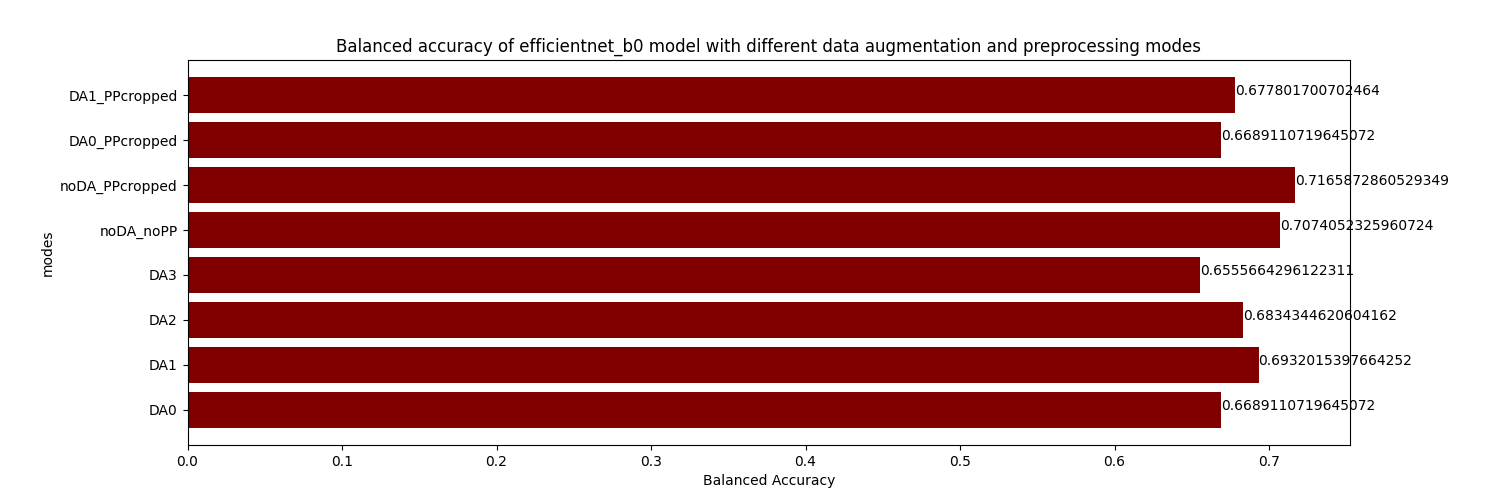

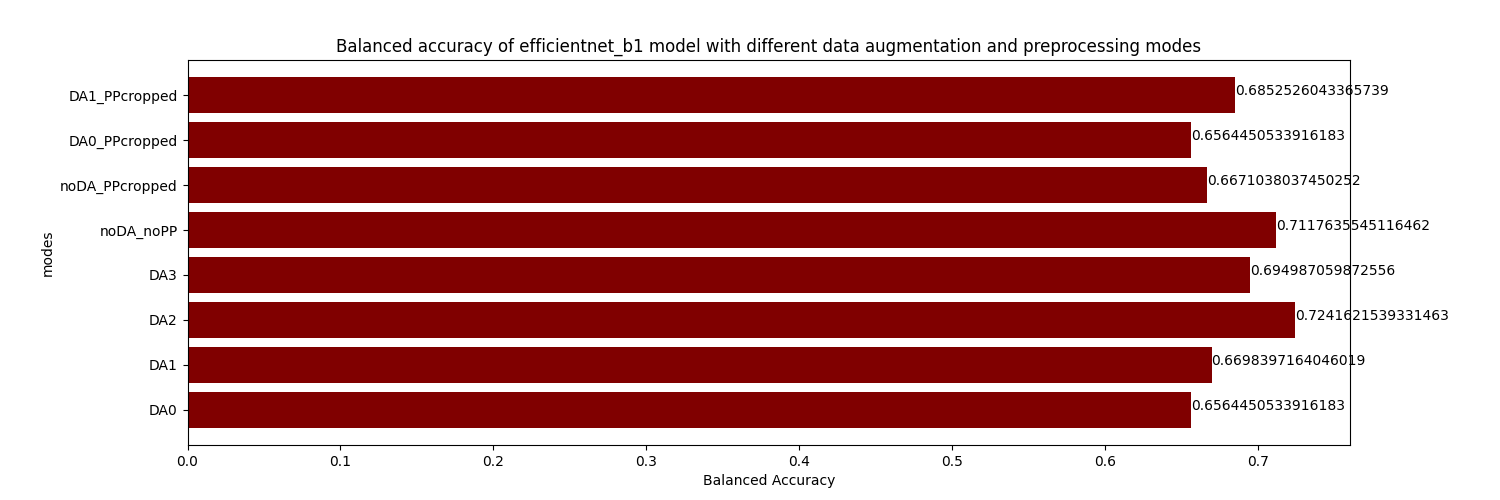

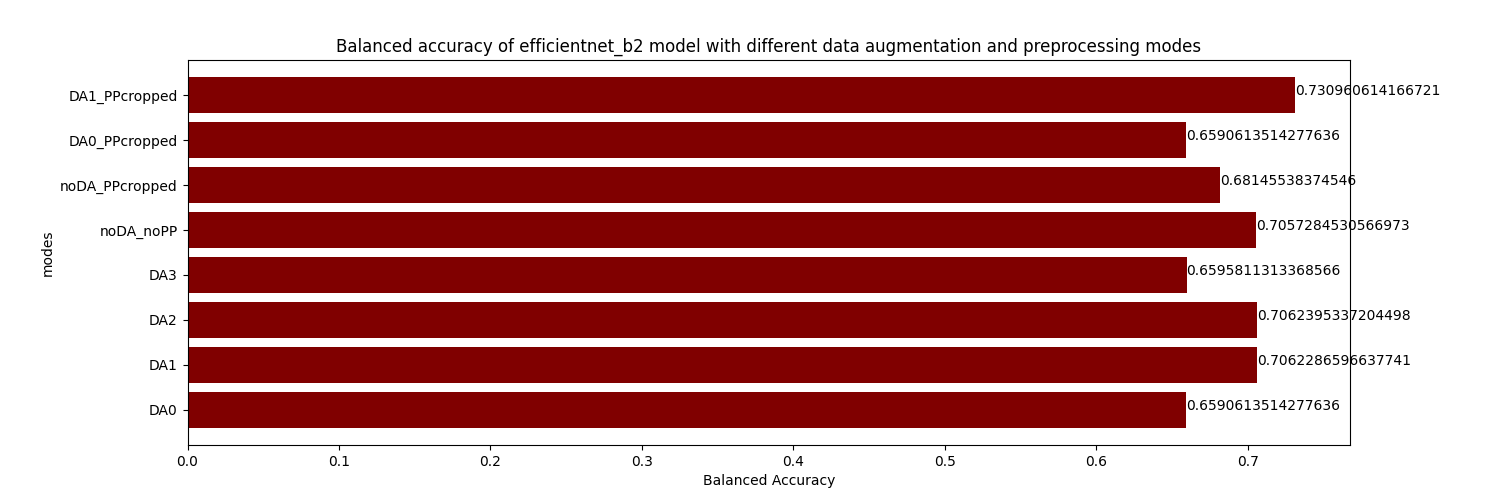

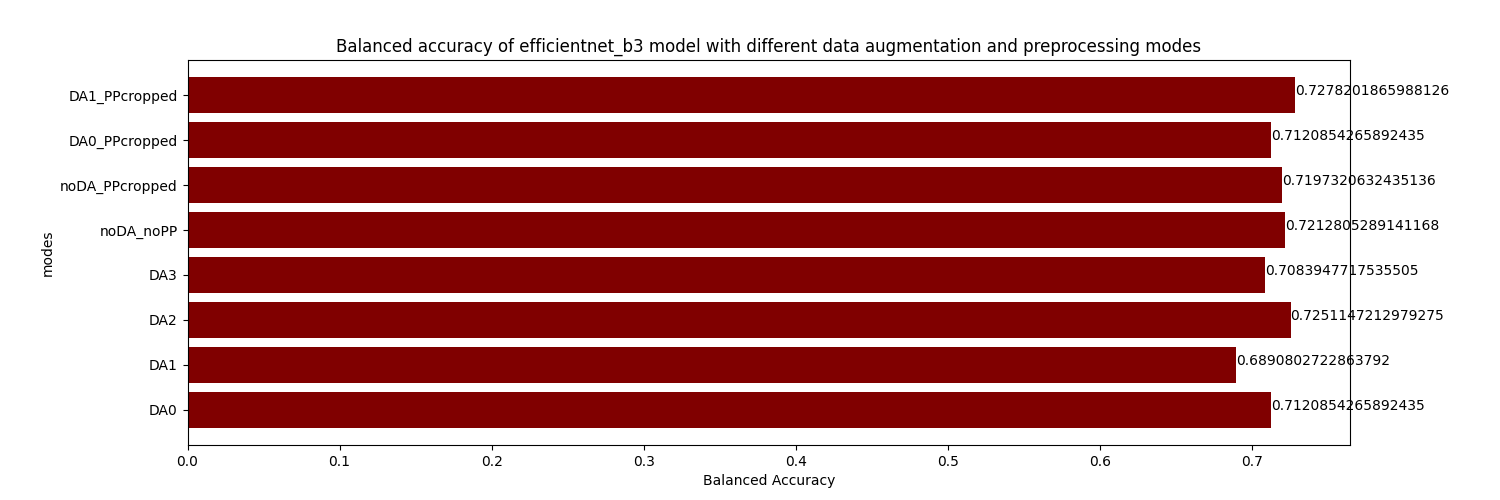

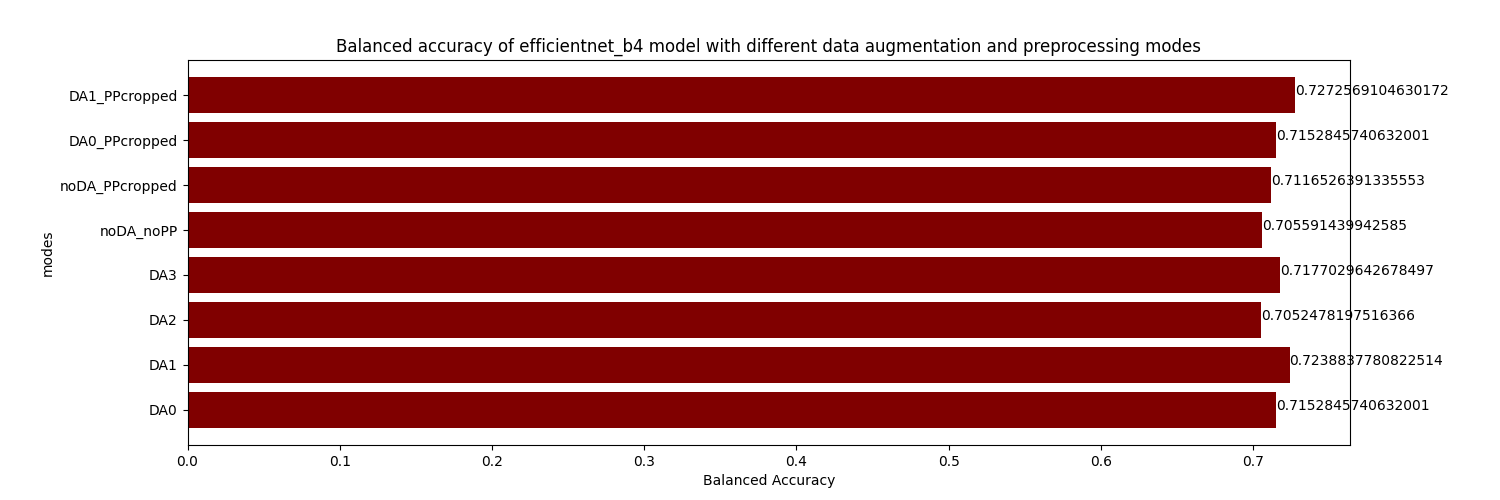

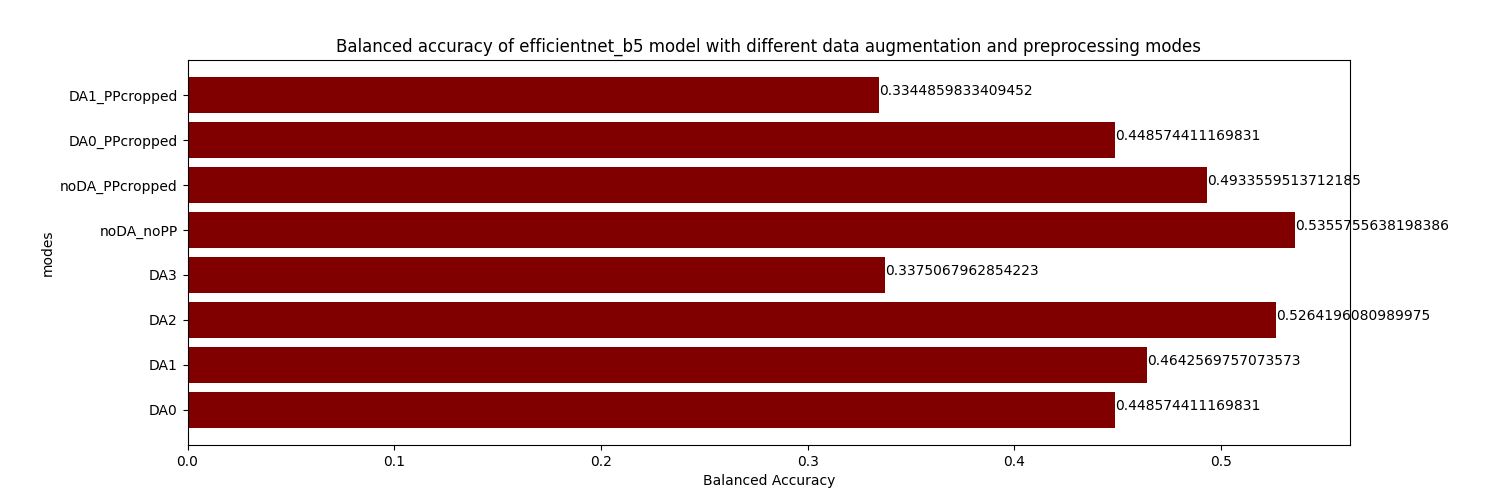

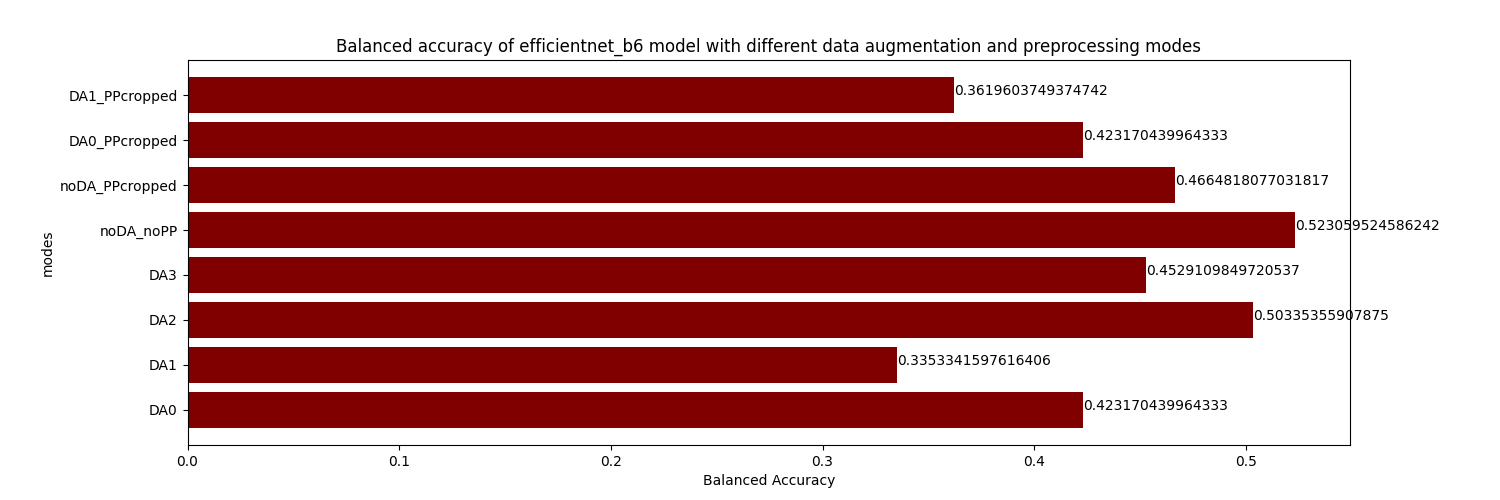

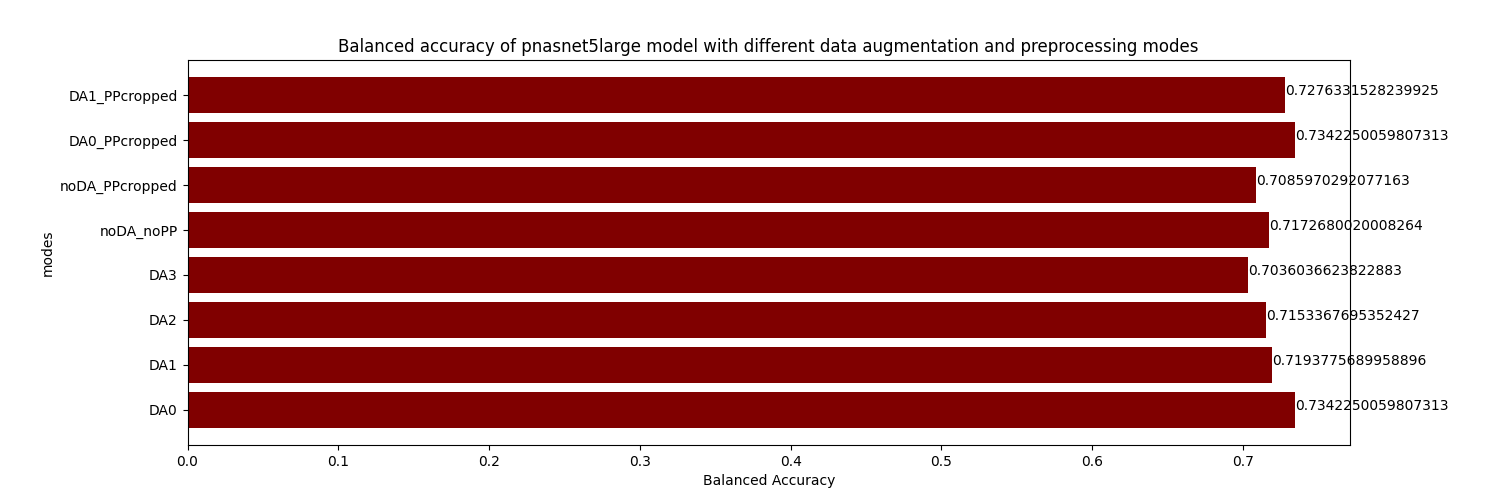

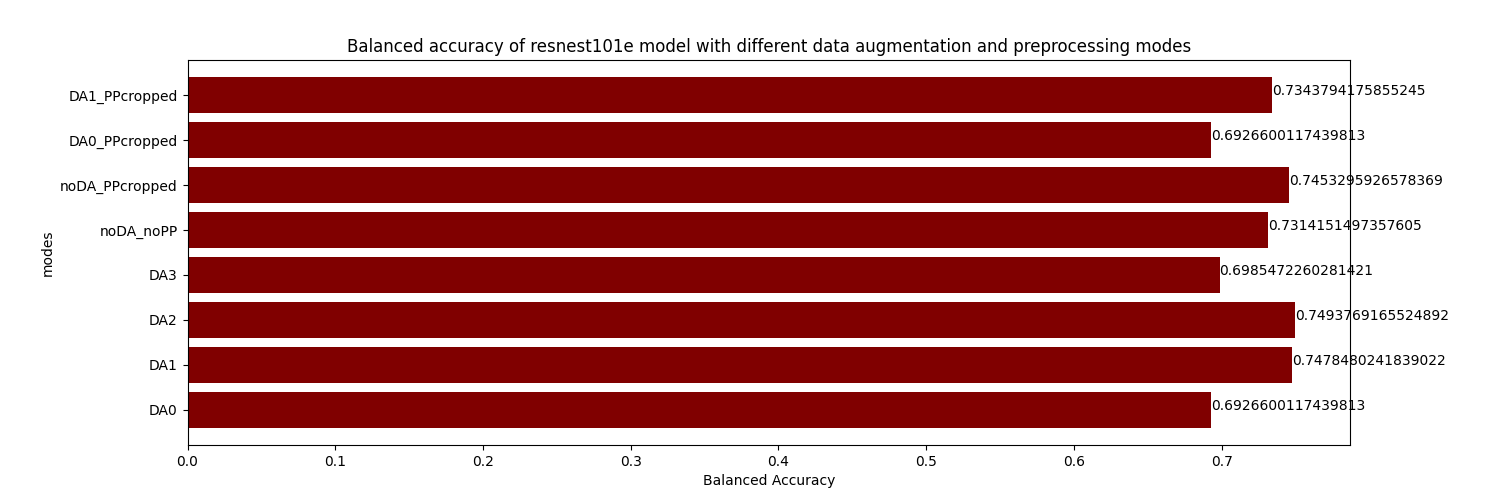

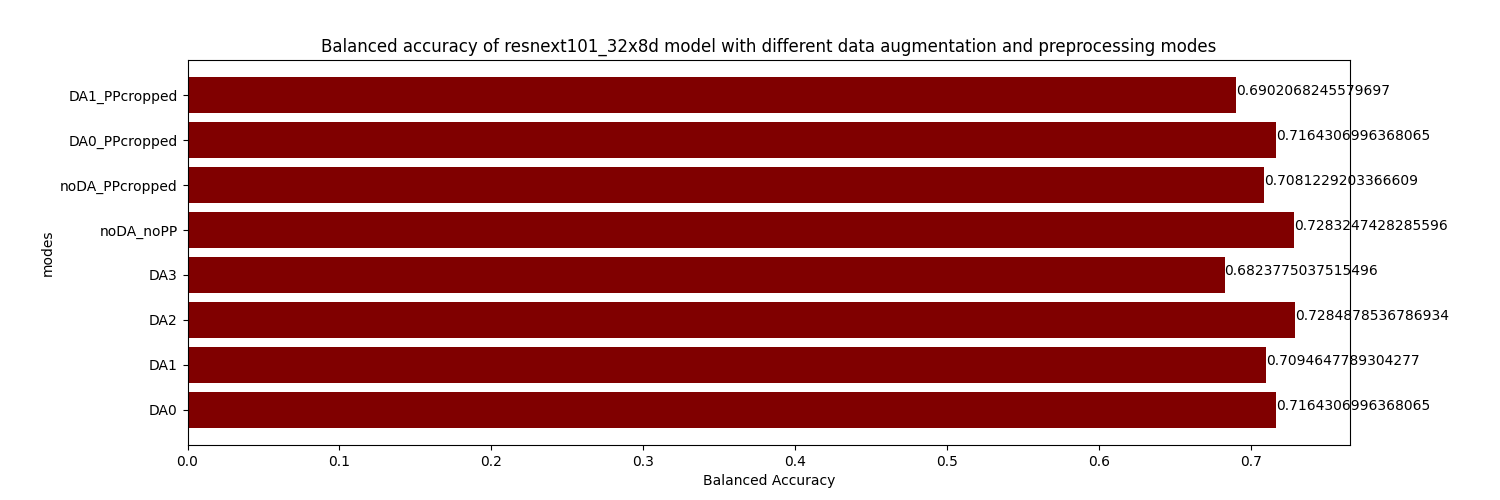

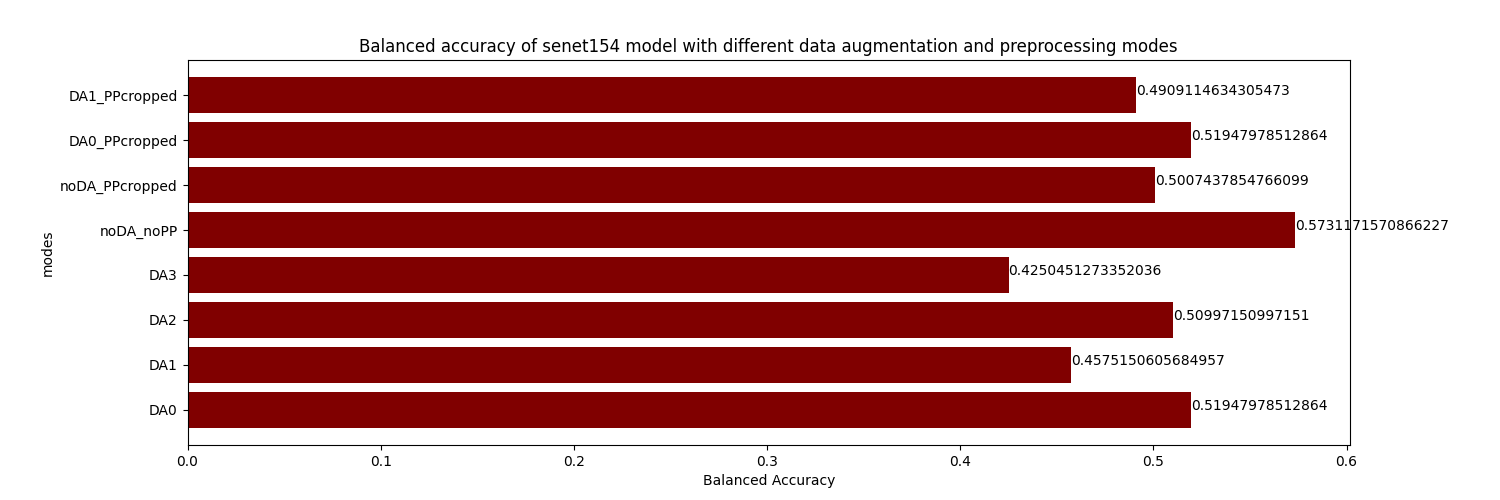

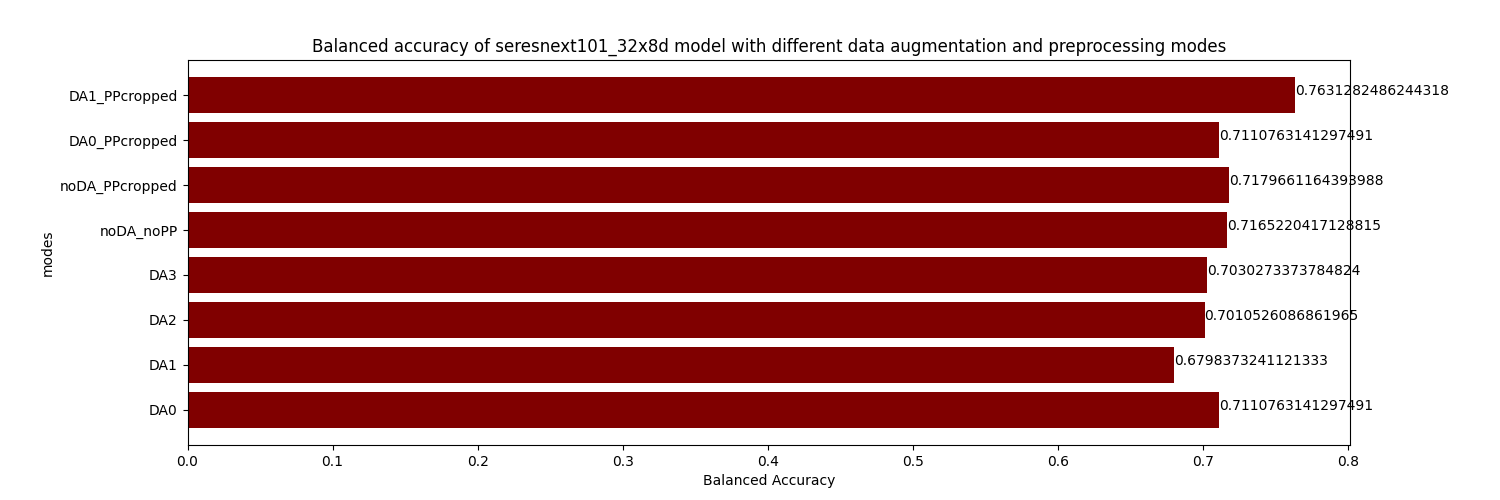

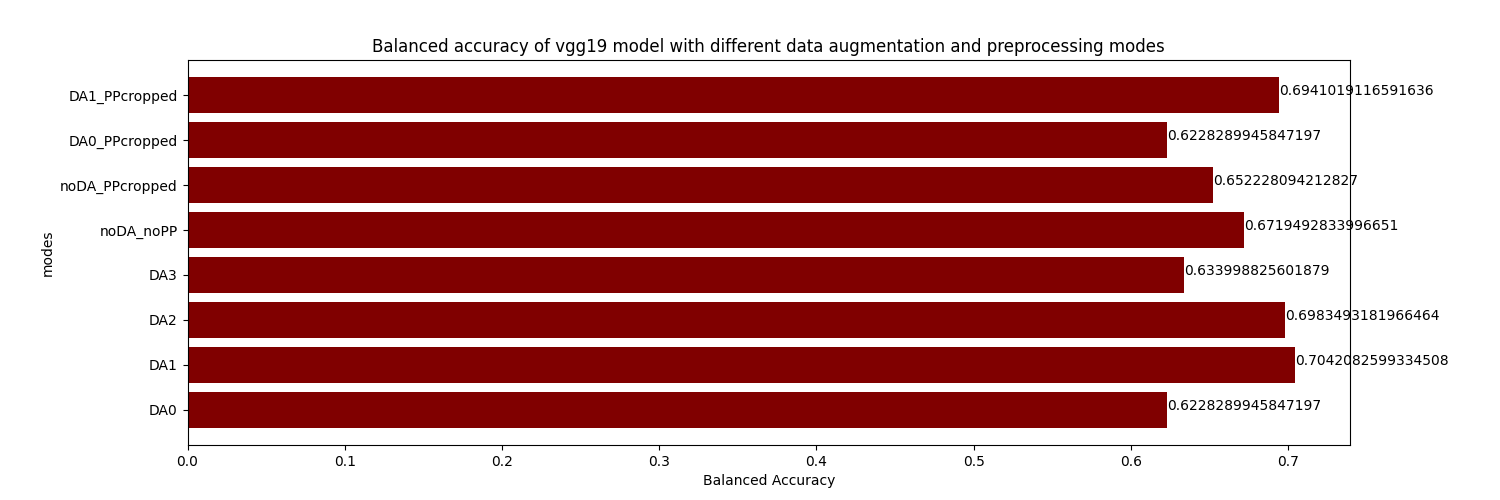

In [75]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np

# labels = df_best_results.groups.keys()


for model_name, group in all_results_grouped:  
    label = model_name

    data = {
        'DA0': [],
        'DA1': [],
        'DA2': [],
        'DA3': [],
        'noDA_noPP': [],
        'noDA_PPcropped': [],
        'DA0_PPcropped': [],
        'DA1_PPcropped': [],
    }

    if group[(group['data_augmentation'] == 'False') & (group['PP_crop_mode'] == 'cropped_images_folder')]['balanced_accuracy'].values.size > 0:
        data['noDA_PPcropped'] = group[(group['data_augmentation'] == 'False') & (group['PP_crop_mode'] == 'cropped_images_folder')]['balanced_accuracy'].sort_values().values[0]
    
    if group[(group['data_augmentation'] == 'False') & (group['PP_crop_mode'] == 'False')]['balanced_accuracy'].values.size > 0:
        data['noDA_noPP'] = group[(group['data_augmentation'] == 'False') & (group['PP_crop_mode'] == 'False')]['balanced_accuracy'].sort_values().values[0]
    
    if group[(group['data_augmentation'] == 1) & (group['PP_crop_mode'] == 'False')]['balanced_accuracy'].values.size > 0:
        data['DA1'] = group[(group['data_augmentation'] == 1) & (group['PP_crop_mode'] == 'False')]['balanced_accuracy'].sort_values().values[0]
    
    if group[group['data_augmentation'] == 2]['balanced_accuracy'].values.size > 0:
        data['DA2'] = group[group['data_augmentation'] == 2]['balanced_accuracy'].sort_values().values[0]
    
    if group[group['data_augmentation'] == 3]['balanced_accuracy'].values.size > 0:
        data['DA3'] = group[group['data_augmentation'] == 3]['balanced_accuracy'].sort_values().values[0]
    
    if group[(group['data_augmentation'] == 0) & (group['PP_crop_mode'] == 'False')]['balanced_accuracy'].values.size > 0:
        data['DA0'] = group[(group['data_augmentation'] == 0) & (group['PP_crop_mode'] == 'False')]['balanced_accuracy'].sort_values().values[0]
    
    if group[(group['data_augmentation'] == 0) & (group['PP_crop_mode'] == 'False')]['balanced_accuracy'].values.size > 0:
        data['DA0_PPcropped'] = group[(group['data_augmentation'] == 0) & (group['PP_crop_mode'] == 'False')]['balanced_accuracy'].sort_values().values[0]
    
    if group[(group['data_augmentation'] == 1) & (group['PP_crop_mode'] == 'cropped_images_folder')]['balanced_accuracy'].values.size > 0:
        data['DA1_PPcropped'] = group[(group['data_augmentation'] == 1) & (group['PP_crop_mode'] == 'cropped_images_folder')]['balanced_accuracy'].values[0]

    modes = list(data.keys())
    values = list(data.values())

    fig = plt.figure(figsize = (15, 5))
 
    # creating the bar plot
    plt.barh(modes, values, color ='maroon')
    
    plt.ylabel("modes")
    plt.xlabel("Balanced Accuracy")
    # display values on top of bars
    for index, value in enumerate(values):
        plt.text(value, index, str(value))
    plt.title("Balanced accuracy of " + label + " model with different data augmentation and preprocessing modes")
    plt.show()
